In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
###Load mitochondrial data
# Create list of filepaths
files = ["HelaFracs_RPF_featureCounts_allSizesAsite_CDSmerge_multi_noDups_mito_tpm_noPseudo_ncRNA.txt",
         "SS1_MTMMinformed6_featureCounts_multi_RPKM_noPseudo_MT.txt",
         "HL_HeLa_MT.txt",
         "Fraction_in_Ribo_HeLa_MT.txt",
         "Transcription_model_HeLa_MT.txt",
         "HEK_RPF_featureCounts_allSizesAsite_CDSmerge_multi_noDups_mito_tpm_noPseudo_ncRNA.txt",
         "HL_HEK_MT_new.txt",
         "K562KOs_RPF_featureCounts_allSizesAsite_CDSmerge_multi_noDups_mito_tpm_noPseudo_ncRNA.txt",
         "HL_K562_MT.txt"]


# Initialize dataframe with first file
mito_data = pd.read_csv(files[0], sep='\t', header=0)

# Merge remaining files into one dataframe
for file in files[1:]:
    mito_data = mito_data.merge(pd.read_csv(file, sep='\t', header=0), left_on='Gene', right_on='Gene')

# remove duplicate columns
mito_data = mito_data.loc[:, ~mito_data.columns.duplicated()]
mito_data = mito_data.set_index('Gene')
mito_data

,RPF_HeLa_1,RPF_HeLa_2,RPF_HeLaSpikeIn_1,RPF_HeLaSpikeIn_2,RPF_Average_HeLa,Mito1,Mito2,Tot1,Tot2,Nanopore_Rep1,...,RPF_K562_Average,TACO1KO_1,TACO1KO_2,PREPLKO_1,PREPLKO_2,NME6KO_1,NME6KO_2,Kdeg_K562_Rep1,Kdeg_K562_Rep2,AVERAGE_K562_kDeg
Gene,,,,,,,,,,,,,,,,,,,,,
MT-CO2,152265.47,121122.33,138312.93,136501.17,137050.4750,5854.32,5817.13,671.81,880.38,334,...,120266.490,154106.69,108658.69,166650.09,128883.57,177285.03,153061.94,0.0101,0.0091,0.010
MT-CYB,110183.11,111570.92,114487.70,112966.03,112301.9400,3666.29,3639.63,412.04,516.10,164,...,60860.735,59442.87,48933.13,62476.68,63053.38,33000.88,30335.17,0.0278,0.0251,0.026
MT-ND2,35544.38,33410.07,35561.07,28188.99,33176.1275,2049.85,2985.43,264.24,376.40,97,...,32657.660,29683.28,25909.10,21859.15,39299.86,33993.69,26765.12,0.0260,0.0246,0.025
MT-ND5,67913.71,68229.13,67803.17,69258.12,68301.0325,2592.12,2842.32,394.52,529.32,160,...,64818.610,36379.59,33173.34,60947.32,67336.45,22483.61,22995.45,0.0300,0.0270,0.028
MT-CO1,157327.05,176944.24,158257.53,176564.26,167273.2700,15683.38,14757.02,2121.87,2251.00,585,...,111790.640,185885.07,221357.55,88002.93,109456.22,172786.96,215993.18,0.0087,0.0082,0.008
MT-ND3,76925.65,87362.27,81468.29,71686.01,79360.5550,1047.90,526.46,129.05,144.10,106,...,116558.830,84038.43,67268.49,139837.30,118688.47,59373.53,62178.32,0.0434,0.0355,0.039
MT-ND1,18399.87,22697.93,17836.72,25726.98,21165.3750,1755.64,2081.83,197.17,283.63,135,...,27057.775,32477.95,70145.42,34916.20,58774.19,29942.44,55931.49,0.0282,0.0267,0.027
MT-CO3,128730.52,140277.64,128827.62,144251.29,135521.7675,13516.20,8480.17,1593.26,1671.08,415,...,115610.560,120457.37,168574.16,123471.47,171276.50,115104.31,176755.17,0.0091,0.0088,0.009
MT-ND4L-4,30980.49,26832.41,31749.64,22651.30,28053.4600,6820.80,7083.21,894.79,1227.49,235,...,44703.395,36639.94,30934.58,56711.53,49228.49,22443.60,17573.21,0.0111,0.0108,0.011


In [3]:
###Load nuclear side of data
# Create list of filepaths
files = [ 
          "HelaErik_RNAseq_featureCounts_CDSmerge_multi_noDups_all_tpm_noPseudo_ncRNA_MitoGenes.txt",
          "HelaGreen_featureCounts_allSizesAsite_CDS_multi_noDups_all_tpm_noPseudo_ncRNA_MitoGenes.txt",
          "TL3_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_1592min.txt",
          "TL4_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_1592min.txt",
          "HEK_cytoRPF_featureCounts_allSizesAsite_CDS_multi_noDups_all_tpm_noPseudo_MitoGenes.txt",
          "TL10_WT_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt",
          "TL12_WT_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt",
          "TL10_LRP_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt",
          "TL12_LRP_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt",
          "K562KOs_cytoRPF_featureCounts_allSizesAsite_CDS_multi_noDups_all_tpm_noPseudo_ncRNA_MitoGenes.txt",
          "BK562_U_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt",
          "BK562_T_Nuc_t5MMinformed5_lenient_modeAll_Mitogenes_FracNew_halflives_corr_10000min_v2.txt"]

# Initialize HeLa dataframe with first file
nuc_data = pd.read_csv(files[0], sep='\t', header=0)

# Merge remaining files into HeLa dataframe
for file in files[1:]:
    nuc_data = nuc_data.merge(pd.read_csv(file, sep='\t', header=0), left_on='Gene', right_on='Gene')

# remove duplicate columns
nuc_data = nuc_data.loc[:, ~nuc_data.columns.duplicated()]
nuc_data = nuc_data.set_index('Gene')
nuc_data

,TPM_HeLa_1,TPM_HeLa_2,Length_x,GeneID_x,RPF_HeLa_1,RPF_HeLa_2,Length_y,GeneID_y,TL3_kDeg,TL3_Half Life,...,RPF_K562_WT_1,RPF_K562_WT_2,TACO1KO_1,TACO1KO_2,PREPLKO_1,PREPLKO_2,NME6KO_1,NME6KO_2,kDeg_K562_Rep1,kDeg_K562_Rep2
Gene,,,,,,,,,,,,,,,,,,,,,
NDUFAB1,220.82,187.12,522,ENSG00000004779,335.56,284.43,522,ENSG00000004779,0.000715,968.710509,...,3.75,4.72,2.40,2.74,2.82,4.03,3.08,4.36,0.002469,0.002398
UQCRC1,209.19,217.52,1495,ENSG00000010256,205.67,208.76,1495,ENSG00000010256,0.000667,1039.504864,...,1.25,1.81,1.31,1.30,1.38,2.08,1.50,1.66,0.001021,0.000857
NDUFS1,121.14,126.31,2235,ENSG00000023228,141.25,141.94,2235,ENSG00000023228,0.002690,257.664639,...,0.63,0.84,0.55,0.70,0.72,0.81,0.75,0.63,0.001345,0.001633
NDUFB4,221.88,215.85,447,ENSG00000065518,409.32,396.22,447,ENSG00000065518,0.002657,260.852754,...,2.86,3.70,1.85,2.29,2.09,4.16,2.36,3.79,0.002041,0.002180
SDHA,176.94,179.85,2126,ENSG00000073578,223.91,194.08,2126,ENSG00000073578,0.003010,230.236158,...,1.17,1.21,0.91,0.92,1.19,1.38,1.16,0.95,0.002506,0.002307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDUFA4,922.95,916.67,243,ENSG00000189043,963.84,903.33,243,ENSG00000189043,0.001244,557.146447,...,7.06,5.66,8.83,9.06,6.84,10.29,6.91,7.95,0.002698,0.003553
SDHD,157.52,135.77,658,ENSG00000204370,108.61,108.38,658,ENSG00000204370,0.001693,409.307509,...,2.74,3.57,2.41,2.76,2.20,3.44,2.66,3.25,0.001101,0.001110
NDUFS3,180.48,156.82,1109,ENSG00000213619,111.01,98.28,1109,ENSG00000213619,0.003323,208.567993,...,1.14,1.78,1.20,1.16,1.13,1.86,0.98,1.35,0.002271,0.002363


In [4]:
### Remove 2 outliers in the nuclear data
nuc_data = nuc_data.drop(index="ATP5F1E")
nuc_data = nuc_data.drop(index="ATP5MC3")
nuc_data

,TPM_HeLa_1,TPM_HeLa_2,Length_x,GeneID_x,RPF_HeLa_1,RPF_HeLa_2,Length_y,GeneID_y,TL3_kDeg,TL3_Half Life,...,RPF_K562_WT_1,RPF_K562_WT_2,TACO1KO_1,TACO1KO_2,PREPLKO_1,PREPLKO_2,NME6KO_1,NME6KO_2,kDeg_K562_Rep1,kDeg_K562_Rep2
Gene,,,,,,,,,,,,,,,,,,,,,
NDUFAB1,220.82,187.12,522,ENSG00000004779,335.56,284.43,522,ENSG00000004779,0.000715,968.710509,...,3.75,4.72,2.40,2.74,2.82,4.03,3.08,4.36,0.002469,0.002398
UQCRC1,209.19,217.52,1495,ENSG00000010256,205.67,208.76,1495,ENSG00000010256,0.000667,1039.504864,...,1.25,1.81,1.31,1.30,1.38,2.08,1.50,1.66,0.001021,0.000857
NDUFS1,121.14,126.31,2235,ENSG00000023228,141.25,141.94,2235,ENSG00000023228,0.002690,257.664639,...,0.63,0.84,0.55,0.70,0.72,0.81,0.75,0.63,0.001345,0.001633
NDUFB4,221.88,215.85,447,ENSG00000065518,409.32,396.22,447,ENSG00000065518,0.002657,260.852754,...,2.86,3.70,1.85,2.29,2.09,4.16,2.36,3.79,0.002041,0.002180
SDHA,176.94,179.85,2126,ENSG00000073578,223.91,194.08,2126,ENSG00000073578,0.003010,230.236158,...,1.17,1.21,0.91,0.92,1.19,1.38,1.16,0.95,0.002506,0.002307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDUFA4,922.95,916.67,243,ENSG00000189043,963.84,903.33,243,ENSG00000189043,0.001244,557.146447,...,7.06,5.66,8.83,9.06,6.84,10.29,6.91,7.95,0.002698,0.003553
SDHD,157.52,135.77,658,ENSG00000204370,108.61,108.38,658,ENSG00000204370,0.001693,409.307509,...,2.74,3.57,2.41,2.76,2.20,3.44,2.66,3.25,0.001101,0.001110
NDUFS3,180.48,156.82,1109,ENSG00000213619,111.01,98.28,1109,ENSG00000213619,0.003323,208.567993,...,1.14,1.78,1.20,1.16,1.13,1.86,0.98,1.35,0.002271,0.002363


In [5]:
# define lists of values for kDeg and RPF
kDeg_values = [mito_data['Average_kDeg_HeLa'],
               mito_data['WT_AVERAGE_kDeg_HL'],
               mito_data['KO_AVERAGE_kDeg_HL'],
               mito_data['AVERAGE_K562_kDeg']]
RPF_values = [mito_data['RPF_Average_HeLa'],
              mito_data['RPF_HEK_WT_Average'],
              mito_data['RPF_HEK_KO_Average'],
              mito_data['RPF_K562_Average']]

# create an empty list to store the results
results_list = []

# create a list of labels
labels = ['HeLa', 'WT', 'KO', 'K562']

# loop over the values of kDeg
for i, kDeg in enumerate(kDeg_values):
    # loop over the values of RPF
    for j, RPF in enumerate(RPF_values):
        
        # model, RSS = (Ktxn/Kdeg), TE = RPF/Nanopore, RSS * TE = translational output
        Txn_Model = mito_data['Ktxn_HeLa (1/(Tint+Telong))']
        Fract_in_Ribo = mito_data['Kribo_HeLa']
        TE_Model = mito_data['RPF_Average_HeLa']/((Txn_Model/kDeg)*Fract_in_Ribo)
       
        Protein_synth = TE_Model * ((Txn_Model/kDeg)*Fract_in_Ribo)
        Total = pearsonr(RPF,Protein_synth)[0]**2
        
        # setting ribosome association to 1
        Fract_in_Ribo = 1
        Protein_synth = TE_Model * ((Txn_Model/kDeg)*Fract_in_Ribo)
        Translation_efficiency =pearsonr(RPF,Protein_synth)[0]**2
        
        # setting translation efficiency to 1
        TE_Model = 1
        Protein_synth = TE_Model * ((Txn_Model/kDeg)*Fract_in_Ribo)
        RSS =pearsonr(RPF,Protein_synth)[0]**2
        
        # setting transcription model to 1
        Txn_Model = 1
        Protein_synth = TE_Model * ((Txn_Model/kDeg)*Fract_in_Ribo)
        Turnover =pearsonr(RPF,Protein_synth)[0]**2
        
        # store the results in a dictionary
        result = {'Total': Total,
                  'Translation_efficiency': Translation_efficiency, 
                  'RSS': RSS,
                  'Turnover': Turnover}
        # add a label to the dictionary
        result['label'] = labels[i] + '_' + labels[j]
        # append the dictionary to the list
        results_list.append(result)

# create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)
results_df

,Total,Translation_efficiency,RSS,Turnover,label
0,1.000000,0.995049,0.504918,0.594058,HeLa_HeLa
1,0.745216,0.712830,0.387251,0.451405,HeLa_WT
2,0.000117,0.000013,0.243897,0.104362,HeLa_KO
3,0.736918,0.715655,0.326216,0.427159,HeLa_K562
4,1.000000,0.995049,0.506118,0.660952,WT_HeLa
5,0.745216,0.712830,0.332158,0.430971,WT_WT
6,0.000117,0.000013,0.226233,0.062734,WT_KO
7,0.736918,0.715655,0.361087,0.532314,WT_K562
8,1.000000,0.995049,0.037716,0.028501,KO_HeLa
9,0.745216,0.712830,0.003767,0.036749,KO_WT


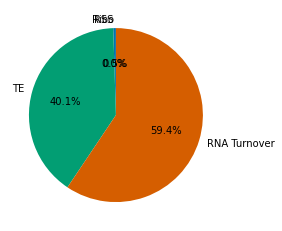

In [6]:
# extract the values from the dataframe

Ribo = results_df['Total']
TE = results_df['Translation_efficiency']
RSS = results_df['RSS']
Turnover = results_df['Turnover']

# Calculate relative importance

remaining_ribo = Ribo[0] - TE[0] if (Ribo[0] - TE[0]) > 0 else 0
remaining_te = TE[0] - RSS[0] if (RSS[0] - Turnover[0]) > 0 else TE[0] - Turnover[0]
remaining_rss = RSS[0] - Turnover[0] if (RSS[0] - Turnover[0]) > 0 else 0
remaining_turnover = Turnover[0]

# create a list of the values and labels for the pie chart
values = [remaining_ribo, remaining_rss, remaining_te, remaining_turnover]
labels = ['Ribo', 'RSS', 'TE', 'RNA Turnover']

fig, ax = plt.subplots()
colors = sns.color_palette("colorblind")
ax.pie(values, labels=labels,autopct='%1.1f%%', startangle=90,colors=colors)

plt.savefig("Pie-chart_mito_use.pdf")
plt.show()

In [7]:
### Nuclear models
# define lists of values for RNA abunandce and RPF
kDeg_values = [nuc_data['TL3_kDeg'],
               nuc_data['TL4_kDeg'],
               nuc_data[['kDeg_K562_Rep1', 'kDeg_K562_Rep2']].mean(axis=1),
               nuc_data[['kDeg_HEK_WT1', 'kDeg_HEK_WT2']].mean(axis=1),
               nuc_data[['kDeg_HEK_KO1', 'kDeg_HEK_KO2']].mean(axis=1)]

RPF_values = [nuc_data['RPF_HeLa_1'],
              nuc_data['RPF_HeLa_2'],
              nuc_data[['RPF_K562_WT_1', 'RPF_K562_WT_2']].mean(axis=1),
              nuc_data[['RPF_HEK_WT1_2', 'RPF_HEK_WT2_2']].mean(axis=1),
              nuc_data[['RPF_HEK_KO1_2', 'RPF_HEK_KO2_2']].mean(axis=1)]


# create an empty list to store the results
results_list = []

# create a list of labels
labels = ['HeLa_Nuc_Model','HeLa_Nuc_Replicate', 'K562_Nuc','WT_Nuc', 'KO_Nuc']

# loop over the values of RNA
for i, kDeg in enumerate(kDeg_values):
    # loop over the values of RPF
    for j, RPF in enumerate(RPF_values):
        # model, RSS = (Ktxn/Kdeg), TE = RPF/Nanopore, RSS * TE = translational output
        Txn_model = nuc_data[['TPM_HeLa_1', 'TPM_HeLa_2']].mean(axis=1) * nuc_data['TL3_kDeg']
        TE_Model = nuc_data['RPF_HeLa_1']/nuc_data[['TPM_HeLa_1', 'TPM_HeLa_2']].mean(axis=1)
            
        Protein_synth = TE_Model * (Txn_model/kDeg)            
        Total_Nuc = pearsonr(RPF,Protein_synth)[0]**2

        # setting translation efficiency to 1
        TE_Model = 1
        Protein_synth = TE_Model * (Txn_model/kDeg) 
        RNA_Nuc =pearsonr(RPF,Protein_synth)[0]**2

        # setting txn to 1
        Txn_model = 1
        Protein_synth = TE_Model * (Txn_model/kDeg) 
        DEG_Nuc =pearsonr(RPF,Protein_synth)[0]**2

            
        # store the results in a dictionary
        result = {'Total_Nuc': Total_Nuc,
                  'RNA_Nuc': RNA_Nuc,
                  'DEG_Nuc' : DEG_Nuc}
        
        # add a label to the dictionary
        result['label'] = labels[i] + '_' + labels[j] 
        # append the dictionary to the list
        results_list.append(result)

# create a DataFrame from the list of dictionaries
results_df_nuc = pd.DataFrame(results_list)
#results_df_nuc

In [8]:
### Mitochondrial models

# define lists of values for kDeg and RPF

kDeg_values = [mito_data['kDeg_TL3'],
               mito_data['kDeg_TL4'],
               mito_data['AVERAGE_K562_kDeg'],
               mito_data['WT_AVERAGE_kDeg_HL'],
               mito_data['KO_AVERAGE_kDeg_HL']]

RPF_values = [mito_data['RPF_HeLa_1'], 
              mito_data['RPF_HeLa_2'],
              mito_data['RPF_K562_Average'],
              mito_data['RPF_HEK_WT_Average'],
              mito_data['RPF_HEK_KO_Average']]

# create an empty list to store the results
results_list = []

# create a list of labels
labels = ['HeLa_mito_Model', 'HeLa_mito_Replicate', 'K562_mito','WT_mito', 'KO_mito']

# loop over the values of kDeg
for i, kDeg in enumerate(kDeg_values):
    # loop over the values of RPF
    for j, RPF in enumerate(RPF_values):
        # model, RSS = (Ktxn/Kdeg), TE = RPF/Nanopore, RSS * TE = translational output
        Txn_model = mito_data['Nanopore_Sum']*mito_data['kDeg_TL3']
        TE_Model = mito_data['RPF_HeLa_1']/mito_data['Nanopore_Sum']
       
        Protein_synth = TE_Model * (Txn_model/kDeg)
        Total_mito = pearsonr(RPF,Protein_synth)[0]**2
        
        # setting translation efficiency to 1
        TE_Model = 1
        Protein_synth = TE_Model * (Txn_model/kDeg) 
        RNA_mito = pearsonr(RPF,Protein_synth)[0]**2
        
        # setting translation efficiency to 1
        Txn_model = 1
        Protein_synth = TE_Model * (Txn_model/kDeg)
        DEG_mito = pearsonr(RPF,Protein_synth)[0]**2
        

        # store the results in a dictionary
        result = {'Total_mito': Total_mito,
                  'RNA_mito': RNA_mito,
                  'DEG_mito': DEG_mito}
        # add a label to the dictionary
        result['label'] = labels[i] + '_' + labels[j]
        # append the dictionary to the list
        results_list.append(result)

# create a DataFrame from the list of dictionaries
results_df_mito = pd.DataFrame(results_list)
results_df_mito

,Total_mito,RNA_mito,DEG_mito,label
0,1.000000,0.575812,0.620621,HeLa_mito_Model_HeLa_mito_Model
1,0.942843,0.621098,0.597767,HeLa_mito_Model_HeLa_mito_Replicate
2,0.744942,0.345514,0.459595,HeLa_mito_Model_K562_mito
3,0.821558,0.356808,0.476488,HeLa_mito_Model_WT_mito
4,0.000208,0.188931,0.082934,HeLa_mito_Model_KO_mito
5,0.973621,0.521145,0.561311,HeLa_mito_Replicate_HeLa_mito_Model
6,0.916686,0.566685,0.542611,HeLa_mito_Replicate_HeLa_mito_Replicate
7,0.675373,0.298385,0.385310,HeLa_mito_Replicate_K562_mito
8,0.782884,0.315332,0.417824,HeLa_mito_Replicate_WT_mito
9,0.017590,0.227155,0.133749,HeLa_mito_Replicate_KO_mito


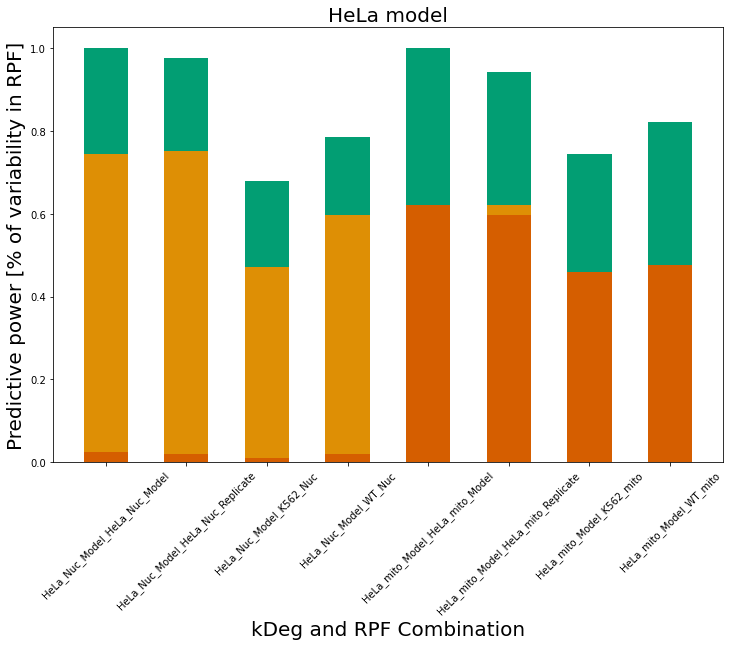

In [9]:
### Plot the gene expression model output

#merge nuclear and mitochondrial dataframes 
merged_df = pd.concat([results_df_nuc, results_df_mito], axis=0)

# list of selected labels to show
selected_labels = ['HeLa_Nuc_Model_HeLa_Nuc_Model','HeLa_Nuc_Model_HeLa_Nuc_Replicate',
                   'HeLa_Nuc_Model_K562_Nuc','HeLa_Nuc_Model_WT_Nuc',
                   'HeLa_mito_Model_HeLa_mito_Model','HeLa_mito_Model_HeLa_mito_Replicate',
                   'HeLa_mito_Model_K562_mito','HeLa_mito_Model_WT_mito']

filtered_df = merged_df.set_index('label').loc[selected_labels].reset_index()
# plotting
# extract the values from the DataFrame
labels = filtered_df['label']
Total_mito = filtered_df['Total_mito']
RNA_mito = filtered_df['RNA_mito']
DEG_mito = filtered_df['DEG_mito']
Total_nuc = filtered_df['Total_Nuc']
RNA_nuc = filtered_df['RNA_Nuc']
DEG_nuc = filtered_df['DEG_Nuc']
width = 0.55       # the width of the bars: can also be len(x) sequence

# Set the color palette to use "pastel" colors
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(labels, Total_mito, width, label='TE HeLa', color=sns.color_palette()[2])
ax.bar(labels, RNA_mito, width, label='Txn HeLa', color=sns.color_palette()[1])
ax.bar(labels, DEG_mito, width, label='kDeg HeLa', color=sns.color_palette()[3])
ax.bar(labels, Total_nuc, width, label='TE HeLa', color=sns.color_palette()[2])
ax.bar(labels, RNA_nuc, width, label='Txn HeLa', color=sns.color_palette()[1])
ax.bar(labels, DEG_nuc, width, label='kDeg HeLa', color=sns.color_palette()[3])

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
ax.set_ylabel('Predictive power [% of variability in RPF]', fontsize=20)
ax.set_title('HeLa model', fontsize=20)
plt.xlabel('kDeg and RPF Combination', fontsize=20)
#ax.legend(fontsize=20)
plt.savefig("HeLa model_both compartments.pdf")
plt.show()


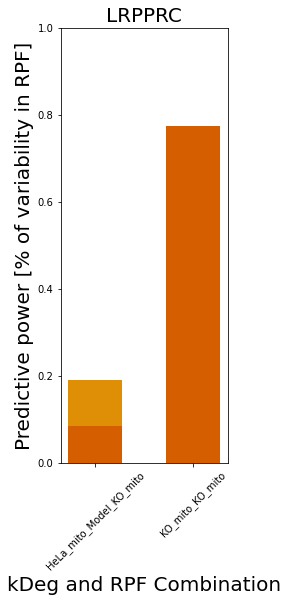

In [10]:
# list of selected labels to show
selected_labels = ['HeLa_mito_Model_KO_mito','KO_mito_KO_mito']

filtered_df = merged_df.set_index('label').loc[selected_labels].reset_index()
# plotting
# extract the values from the DataFrame
labels = filtered_df['label']
Total_mito = filtered_df['Total_mito']
RNA_mito = filtered_df['RNA_mito']
DEG_mito = filtered_df['DEG_mito']

width = 0.55       # the width of the bars: can also be len(x) sequence

# Set the color palette to use "pastel" colors
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(3,8))
ax.bar(labels, Total_mito, width, label='TE HeLa', color=sns.color_palette()[2])
ax.bar(labels, RNA_mito, width, label='Txn HeLa', color=sns.color_palette()[1])
ax.bar(labels, DEG_mito, width, label='kDeg HeLa', color=sns.color_palette()[3])


plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
ax.set_ylabel('Predictive power [% of variability in RPF]', fontsize=20)
ax.set_title('LRPPRC', fontsize=20)
plt.xlabel('kDeg and RPF Combination', fontsize=20)
plt.ylim([0, 1])
#ax.legend(fontsize=20)
#plt.savefig("HeLa model_both compartments_LRPPRC.pdf")
plt.show()
